# Predicting Car Prices

The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. You can read more about the data set and download it [here](https://archive.ics.uci.edu/ml/datasets/automobile)

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 99

In [2]:
col_names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 
             'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
             'engine-location', 'wheel-base', 'length', 'width', 'height',
             'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
             'fuel-system', 'bore', 'stroke', 'compression-ratio',
             'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=col_names)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


We'll use the k-Nearest Neighbors machine learning model to predict the car prices. In order to do so, we need to determine which columns are continuous and can be used as features and which column is the target column. Below, there are the columns we'll be using:

**Features:** `normalized-losses`, `wheel-base`, `length`, `width`, `height`, `curb-weight`, `engine-size`, `bore`, `stroke`, `compression-ratio`, `horsepower`, `peak-rpm`, `city-mpg`, `highway-mpg`.

**Target:** `price`

In [3]:
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 
                          'width', 'height', 'curb-weight', 'engine-size', 
                          'bore', 'stroke', 'compression-ratio', 
                          'horsepower', 'peak-rpm', 'city-mpg', 
                          'highway-mpg', 'price']
# Selecting only numeric continuous values columns
cont_cars = cars[continuous_values_cols]

## Handling Missing Values

In [4]:
cont_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized-losses    205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-size          205 non-null int64
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-null object
peak-rpm             205 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                205 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


Apparently, all columns haven't non-null values. However, as we see on the data set preview, the column `normalized-losses` contains missing values represented as "?".
Let's replace these values and look for the presence of missing values in other numeric columns.

In [5]:
# Replacing all "?" to NaN values
cont_cars = cont_cars.replace('?', np.nan)

In [6]:
# Converting all column values to float type
cont_cars = cont_cars.astype('float')
# Counting the number of missing values in each column
cont_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

As our target is the `price` column, we'll drop all the 4 rows with missing values in this column:

In [7]:
# Droping all rows containing missing values in the price column
cont_cars = cont_cars.dropna(subset=['price'])
cont_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

Since the `normalized-losses` column has 37 missing values, if we drop the rows entirely, we would lost almost 20% of our data. Let's check the values in this column to make a decision whether we drop the column entirely or replace the missing values using the average values from this column.

In [8]:
print(cont_cars['normalized-losses'].std())
cont_cars['normalized-losses'].value_counts()

35.442167530553256


161.0    11
91.0      8
150.0     7
104.0     6
128.0     6
134.0     6
102.0     5
85.0      5
103.0     5
168.0     5
74.0      5
95.0      5
94.0      5
65.0      5
122.0     4
148.0     4
118.0     4
93.0      4
106.0     4
115.0     3
125.0     3
83.0      3
101.0     3
137.0     3
154.0     3
188.0     2
81.0      2
192.0     2
158.0     2
145.0     2
113.0     2
110.0     2
153.0     2
129.0     2
194.0     2
197.0     2
87.0      2
89.0      2
119.0     2
164.0     2
108.0     2
231.0     1
107.0     1
78.0      1
256.0     1
98.0      1
121.0     1
77.0      1
142.0     1
90.0      1
186.0     1
Name: normalized-losses, dtype: int64

As the variance of these values is not too high, we decided to keep it and replace the missing values with the mean. We'll also substitute the missing values in the other four columns with the mean of each respective column.

In [9]:
# Replacing all missing values with the mean of their respective column
cont_cars = cont_cars.fillna(cont_cars.mean())
cont_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

## Normalizing Columns

In order to make each feature contributes approximately proportionately in the model and do not get bias due to the broad range of values between columns, we'll normalize the column values to range between 0 and 1.

In [10]:
price_col = cont_cars['price']
normalized_cars=(cont_cars-cont_cars.min())/(cont_cars.max()-cont_cars.min())
normalized_cars['price'] = price_col
normalized_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Univariate k-Nearest Neighbors

### Using the default k value

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score

def knn_train_test(col, target, df):
    kf = KFold(n_splits=2, shuffle=True, random_state=1)
    model = KNeighborsRegressor()
    mses = cross_val_score(model, df[[col]], df[target], 
                    scoring='neg_mean_squared_error', cv=kf)
    rmses = (abs(mses))**0.5
    avg_rmse = np.mean(rmses)
    return avg_rmse

In [12]:
cols = normalized_cars.columns.drop('price')
rmse_dict = {}
for col in cols:
    rmse_dict[col] = round(knn_train_test(col, 'price', normalized_cars),2)
    
rmse_dict

{'bore': 6561.16,
 'city-mpg': 4788.02,
 'compression-ratio': 6875.61,
 'curb-weight': 4130.92,
 'engine-size': 3364.29,
 'height': 7735.81,
 'highway-mpg': 4336.43,
 'horsepower': 3983.29,
 'length': 5645.8,
 'normalized-losses': 7482.63,
 'peak-rpm': 7721.99,
 'stroke': 7768.26,
 'wheel-base': 5709.57,
 'width': 4480.76}

### Varying the k value

In [13]:
def knn_train_test_k(col, target, df):
    k_vals = [1, 3, 5, 7, 9]
    avg_rmse_dict = {}
    for k in k_vals:
        kf = KFold(n_splits=2, shuffle=True, random_state=1)
        model = KNeighborsRegressor(n_neighbors=k)
        mses = cross_val_score(model, df[[col]], df[target], 
                    scoring='neg_mean_squared_error', cv=kf)
        rmses = (abs(mses))**0.5
        avg_rmse = np.mean(rmses)
        avg_rmse_dict[k] = avg_rmse
    return avg_rmse_dict

In [14]:
rmse_dict_k = {}
for col in cols:
    rmse_dict_k[col] = knn_train_test_k(col, 'price', normalized_cars)
rmse_dict_k

{'bore': {1: 7621.538208760644,
  3: 6437.139676823377,
  5: 6561.161516346088,
  7: 6634.459205363681,
  9: 6697.647393148453},
 'city-mpg': {1: 5871.920826750951,
  3: 4727.348409434364,
  5: 4788.02204494846,
  7: 4939.508734499681,
  9: 4858.913093452284},
 'compression-ratio': {1: 8499.42788265848,
  3: 7112.2506526982925,
  5: 6875.609561238276,
  7: 6834.8632068665365,
  9: 6837.759359617571},
 'curb-weight': {1: 5480.3387464948755,
  3: 4564.972121550114,
  5: 4130.915690353671,
  7: 4048.463958309884,
  9: 4265.530904180105},
 'engine-size': {1: 4063.687923644082,
  3: 3282.6218815594984,
  5: 3364.2854728914,
  7: 3650.146869821362,
  9: 3841.761337660194},
 'height': {1: 10146.330793428593,
  3: 8275.871971047809,
  5: 7735.811797200045,
  7: 7819.5009556460045,
  9: 7722.600515996639},
 'highway-mpg': {1: 6115.698685284922,
  3: 4579.039307478401,
  5: 4336.427992998121,
  7: 4478.246829254598,
  9: 4589.306114328255},
 'horsepower': {1: 4596.356051035821,
  3: 4029.8729687

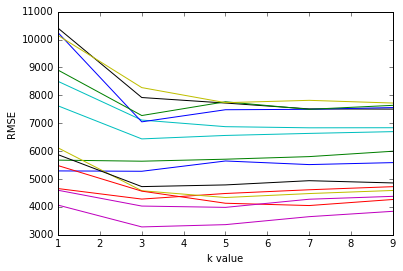

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in rmse_dict_k.items():
    x, y = zip(*sorted(v.items()))
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

## Multivariate k-Nearest Neighbors

### Using all features

In [16]:
def knn_train_test_cols(cols, target, df):
    kf = KFold(n_splits=2, shuffle=True, random_state=1)
    model = KNeighborsRegressor()
    mses = cross_val_score(model, df[cols], df[target], 
                           scoring='neg_mean_squared_error', cv=kf)
    rmses = (abs(mses))**0.5
    avg_rmse = np.mean(rmses)
    return avg_rmse

In [17]:
knn_train_test_cols(cols, 'price', normalized_cars)

4009.9014350654124

### Using n best features

In [18]:
rmse_series = pd.Series(rmse_dict)
sorted_series = rmse_series.sort_values()
print(sorted_series)
sorted_series_index = sorted_series.index
print(sorted_series_index)

engine-size          3364.29
horsepower           3983.29
curb-weight          4130.92
highway-mpg          4336.43
width                4480.76
city-mpg             4788.02
length               5645.80
wheel-base           5709.57
bore                 6561.16
compression-ratio    6875.61
normalized-losses    7482.63
peak-rpm             7721.99
height               7735.81
stroke               7768.26
dtype: float64
Index(['engine-size', 'horsepower', 'curb-weight', 'highway-mpg', 'width',
       'city-mpg', 'length', 'wheel-base', 'bore', 'compression-ratio',
       'normalized-losses', 'peak-rpm', 'height', 'stroke'],
      dtype='object')


In [19]:
def knn_train_test_best(cols, target, df):
    kf = KFold(n_splits=2, shuffle=True, random_state=1)
    model = KNeighborsRegressor()
    mses = cross_val_score(model, df[cols], df[target], 
                           scoring='neg_mean_squared_error', cv=kf)
    rmses = (abs(mses))**0.5
    avg_rmse = np.mean(rmses)
    return avg_rmse

In [20]:
for best in range(2,7):
    print('best {} features: '.format(best))
    print(knn_train_test_best(sorted_series_index[:best], 'price', 
                              normalized_cars))

best 2 features: 
3280.346853325223
best 3 features: 
3422.0286056245513
best 4 features: 
3299.907917055727
best 5 features: 
3383.9617472246973
best 6 features: 
3429.939407434297


## Hyperparameter Tuning

In [21]:
def knn_train_test_k_best(cols, target, df):
    k_vals = [x for x in range(1,26)]
    avg_rmse_dict = {}
    for k in k_vals:
        kf = KFold(n_splits=2, shuffle=True, random_state=1)
        model = KNeighborsRegressor(n_neighbors=k)
        mses = cross_val_score(model, df[cols], df[target], 
                    scoring='neg_mean_squared_error', cv=kf)
        rmses = (abs(mses))**0.5
        avg_rmse = np.mean(rmses)
        avg_rmse_dict[k] = avg_rmse
    return avg_rmse_dict

In [22]:
# Selecting only the top 4 models in the last step
rmse_dict_bests = {}
for best in [2, 3, 4, 5]:
    rmse_dict_bests[best] = knn_train_test_k_best(
                            sorted_series_index[:best], 'price', 
                            normalized_cars)
rmse_dict_bests

{2: {1: 3679.949898962563,
  2: 3132.3971481966014,
  3: 2942.136984611656,
  4: 3127.183961130523,
  5: 3280.346853325223,
  6: 3463.6996288453875,
  7: 3604.8826326935714,
  8: 3726.773177874364,
  9: 3940.6574822647076,
  10: 4101.019695494881,
  11: 4215.264347494822,
  12: 4317.980195168363,
  13: 4419.328251706245,
  14: 4440.530802722442,
  15: 4486.269107348751,
  16: 4606.314147240047,
  17: 4682.365189065014,
  18: 4705.622465349787,
  19: 4710.504126718423,
  20: 4671.295738342903,
  21: 4637.852320989703,
  22: 4664.269628964048,
  23: 4702.302697653737,
  24: 4749.142852641662,
  25: 4832.460366824267},
 3: {1: 3228.089618601807,
  2: 3271.7951248067775,
  3: 3299.604139982861,
  4: 3425.695681450972,
  5: 3422.0286056245513,
  6: 3460.682554307003,
  7: 3633.2246919526388,
  8: 3758.930708511786,
  9: 3794.1782089124117,
  10: 3936.5821642605,
  11: 4055.1661765519602,
  12: 4068.520352940378,
  13: 4059.1438643083416,
  14: 4166.755564172431,
  15: 4222.275678916842,
  1

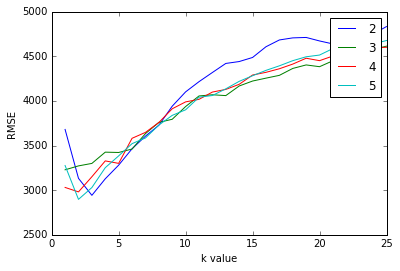

In [23]:
for k,v in rmse_dict_bests.items():
    x, y = zip(*sorted(v.items()))
    plt.plot(x,y, label="{}".format(k))
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend()

In [24]:
for k,v in rmse_dict_bests.items():
    min_key = min(v, key=v.get)
    min_value = round(min(v.values()), 2)
    print("For the {} best features, the optimal k is {}, with a RMSE = {} ".format(k, min_key, min_value))

For the 2 best features, the optimal k is 3, with a RMSE = 2942.14 
For the 3 best features, the optimal k is 1, with a RMSE = 3228.09 
For the 4 best features, the optimal k is 2, with a RMSE = 2980.56 
For the 5 best features, the optimal k is 2, with a RMSE = 2896.84 


# Conclusions

Based on our validation and hyperparameter tuning we have reached to following conclusion:

- The best combination of features to get most accurate result is using the five best features: engine_size, horsepower, curb-weight, highway-mpg and width.
- The best k value to get most accurate result is 2.